# Payment Network

The `payment_simulator` package is designed to simulate payment transactions within large-value payment systems. While it is tailored for high-value transactions often seen in systems like RTGS (Real-Time Gross Settlement), it can also generate synthetic transaction data for other types of payment systems, including retail payments or blockchain-based platforms. This simulation is conducted through the creation of a payment network consisting of nodes (participants, typically banks) and edges (transactions between these participants). The network's structure is randomly determined based on specified parameters. This guide demonstrates how to utilize the `SimplePaymentNetwork` and `GroupedPaymentNetwork` classes to generate and analyze these networks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from payment_simulator import GroupedPaymentNetwork, SimplePaymentNetwork
from payment_simulator.utils import calculate_network_params

np.random.seed(1234)

In [2]:
TOTAL_BANKS = 10
INITIAL_BANKS = 3
INCREMENT_BANKS = 4
ALPHA = 1e-5
AVG_PAYMENTS = 100
ALLOW_SELF_LOOP = False

## Simple Payment Network

The `SimplePaymentNetwork` class simulates a payment network by sequentially adding banks and transactions. It selects random senders and receivers based on a preferential attachment vector, which is adjusted by a parameter alpha to increase the likelihood of previously chosen banks being selected again. This class also allows the configuration of self-transactions, where banks can send payments to themselves.

### Simulating Payments

The `simulate_payments` method executes the network simulation. It starts by adding a set of `initial_banks` that begin transacting amongst themselves. In each subsequent iteration, additional banks are introduced according to the `increment` parameter, increasing the complexity of the network.

In [3]:
network = SimplePaymentNetwork(total_banks=TOTAL_BANKS,
                               avg_payments=AVG_PAYMENTS,
                               allow_self_loop=ALLOW_SELF_LOOP,
                               alpha=ALPHA)

network.simulate_payments(increment=INCREMENT_BANKS, init_banks=INITIAL_BANKS)

### Checking the Results 

After running the simulation, you can examine the final preferential attachment using the `network.h` attribute. The `extract_link_matrix` method provides a normalized view of the transaction links between participants, indicating the proportion of transactions between each pair of banks.

In [4]:
print("Preferential Attachment of Banks:")
print(network.h)

print("\nNetwork links:")
print(np.round(network.extract_link_matrix(prop=False).astype(int), 4))

print("\nNetwork links:")
print(np.round(network.extract_link_matrix(), 4))

Preferential Attachment of Banks:
[1.00425 1.00399 1.00378 1.00234 1.00204 1.00119 1.00087 1.00061 1.00051
 1.00042]

Network links:
[[ 0 78 66 25 22 15  8  2  3  3]
 [63  0 61 20 22  8  1  3  1  2]
 [62 78  0 28 20  4  5  1  3  1]
 [28 21 16  0 28  5  5  2  2  3]
 [24 13 12 19  0  9  4  4  5  1]
 [12  9  9 12  7  0  4  0  4  2]
 [ 6 11  4 12  4 10  0  5  0  2]
 [ 2  3  4  5  5  3  4  0  7  5]
 [ 5  3  2  2  4  2  0  2  0  3]
 [ 1  2  2  1  1  4  2  4  3  0]]

Network links:
[[0.    0.078 0.066 0.025 0.022 0.015 0.008 0.002 0.003 0.003]
 [0.063 0.    0.061 0.02  0.022 0.008 0.001 0.003 0.001 0.002]
 [0.062 0.078 0.    0.028 0.02  0.004 0.005 0.001 0.003 0.001]
 [0.028 0.021 0.016 0.    0.028 0.005 0.005 0.002 0.002 0.003]
 [0.024 0.013 0.012 0.019 0.    0.009 0.004 0.004 0.005 0.001]
 [0.012 0.009 0.009 0.012 0.007 0.    0.004 0.    0.004 0.002]
 [0.006 0.011 0.004 0.012 0.004 0.01  0.    0.005 0.    0.002]
 [0.002 0.003 0.004 0.005 0.005 0.003 0.004 0.    0.007 0.005]
 [0.005 0.003 0.

The distribution of transactions can be visualized using a heatmap, where lighter areas represent a higher frequency of transactions between nodes. This visualization aligns with network theories suggesting that most nodes typically have fewer connections.

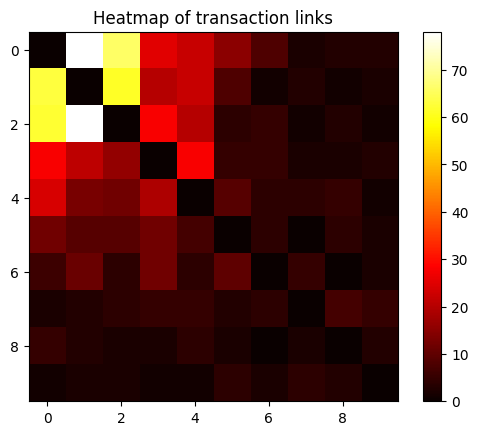

In [5]:
plt.imshow(network.extract_link_matrix(False), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of transaction links')
plt.show()

The `payment_simulator` package comes equipped with utility functions to help analyze key network metrics that can provide insights into the structure and efficiency of the network, which is `calculate_network_params`. It computes various network metrics such as the number of nodes, number of links, connectivity, reciprocity, average degree, and the maximum in and out degree values.

In [6]:
pd.Series(calculate_network_params(network.G))

Number of nodes       10.000000
Number of links       87.000000
Connectivity           0.966667
Reciprocity            0.988506
Average Degree (k)    17.400000
Max (k-in)             9.000000
Max (k-out)            9.000000
dtype: float64

## Grouped Payment Network

The `GroupedPaymentNetwork` leverages a given list of transaction proportions. This proportion represent the size of the group within the network from the biggest to the smallest. It works similarly when deciding the sender and receiver, which is by selecting randomly from pool of nodes with their preferential attachement score. The different lies in how the nodes and edges are added to the network. 

In [7]:
g_total_banks = 43
g_avg_payments = 35
g_alpha = 1e-5
g_bank_groups = [0.15, 0.20, 0.35, 0.30]

g_network = GroupedPaymentNetwork(
    total_banks=g_total_banks,
    bank_groups=g_bank_groups,
    avg_payments=g_avg_payments,
    alpha=g_alpha,
    allow_self_loop=ALLOW_SELF_LOOP,
)

g_network.simulate_payments(increment=5, init_banks=10)

Similar to the previous class, we can observe the preferential attachement as well as the link matrix.

In [8]:
print("Preferential Attachement of Banks:")
print(g_network.h)

print("\nNetwork links:")
print(np.round(g_network.extract_link_matrix(prop=False).astype(int), 4))

print("\nNetwork links:")
print(np.round(g_network.extract_link_matrix(), 4))

assert (g_network.extract_link_matrix(False).sum() == g_total_banks * g_avg_payments)

Preferential Attachement of Banks:
[1.00161 1.00146 1.00168 1.00177 1.00162 1.0016  1.00178 1.00158 1.00188
 1.00196 1.00092 1.00089 1.00076 1.00073 1.00061 1.00074 1.00076 1.00065
 1.00073 1.00055 1.00056 1.0004  1.00051 1.00064 1.00031 1.00039 1.00027
 1.00036 1.00031 1.00029 1.00024 1.00026 1.00024 1.00008 1.00028 1.00016
 1.00014 1.00009 1.00008 1.00009 1.00008 1.00001 1.00003]

Network links:
[[ 0  5 13 ...  0  1  0]
 [ 4  0  4 ...  1  0  0]
 [ 9  5  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 1  1  0 ...  0  0  0]]

Network links:
[[0.     0.0033 0.0086 ... 0.     0.0007 0.    ]
 [0.0027 0.     0.0027 ... 0.0007 0.     0.    ]
 [0.006  0.0033 0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.0007 0.0007 0.     ... 0.     0.     0.    ]]


We could also observe the similar pattern on the number of links for all nodes. Most nodes only have less than two connection to other nodes.

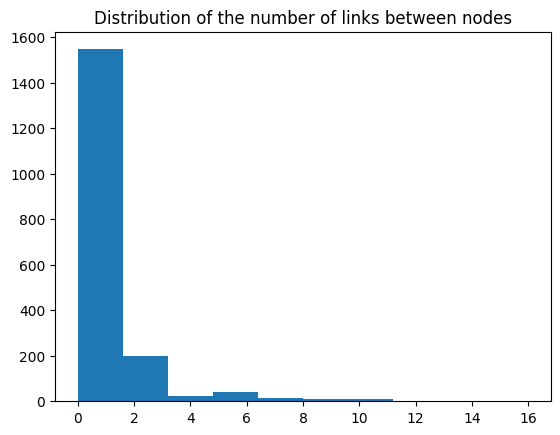

In [9]:
plt.hist(g_network.extract_link_matrix(prop=False).astype(int).flatten())
plt.title("Distribution of the number of links between nodes")
plt.show()

Here, the heatmap of links between two nodes for the grouped network.

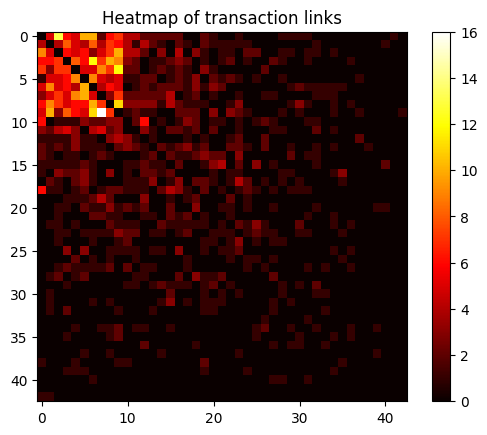

In [10]:
plt.imshow(g_network.extract_link_matrix(False), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap of transaction links')
plt.show()

We can also calculate some network metrics.

In [11]:
pd.Series(calculate_network_params(g_network.G))

Number of nodes        43.000000
Number of links       680.000000
Connectivity            0.376523
Reciprocity             0.600000
Average Degree (k)     31.627907
Max (k-in)             27.000000
Max (k-out)            27.000000
dtype: float64